<a href="https://colab.research.google.com/github/olatnattantalo/colabdeeplearning/blob/master/notebooks/Deep_Learning_com_Google_Colab_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch; torch.manual_seed(0)
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import random; random.seed(0)
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import math

from torchvision import models
from torch.autograd import Variable
from torchvision import transforms

from sklearn.metrics import classification_report

In [2]:
if torch.cuda.is_available():
    print('CUDA is available. Usinh the GPU...')
    device = torch.device('cuda')
else:
    print('CUDA is no available. Usinh the CPU...')
    device = torch.device('cpu')

CUDA is available. Usinh the GPU...


In [3]:
train_transforms = transforms.Compose([
    #transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Fashion-MNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(
    root='../../data',
    train=True,
    transform=train_transforms,
    download=True
)

val_dataset = torchvision.datasets.FashionMNIST(
    root='../../data',
    train=False,
    transform=transforms.ToTensor(),
    download=True
)


Extracting ../../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../../data/FashionMNIST/raw



Extracting ../../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../../data/FashionMNIST/raw



Extracting ../../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/FashionMNIST/raw



Extracting ../../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/FashionMNIST/raw
Processing...
Done!


In [0]:
batch_size = 128

train_loader = torch.utils.data.DataLoader(train_dataset, 
                                           batch_size = batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size = batch_size)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


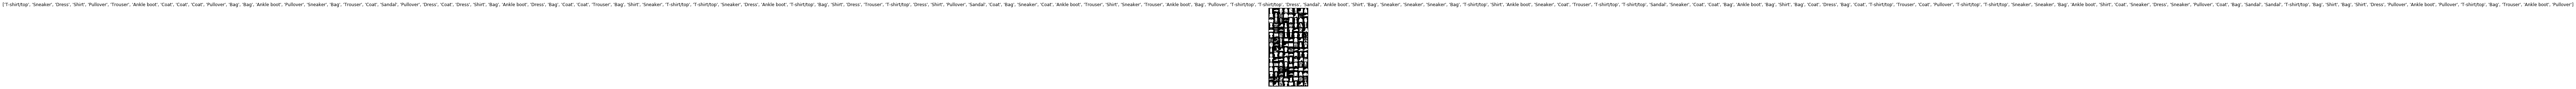

In [5]:
for images, labels in train_loader:
    grid = torchvision.utils.make_grid(images)

    plt.imshow(grid.numpy().transpose((1, 2, 0)))
    plt.title([train_dataset.classes[label] for label in labels.numpy()]) 
    plt.axis('off')
    plt.show()

    break

In [6]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [0]:

class DoubleLayerNet(torch.nn.Module):
    def __init__(self, n_hidden1, n_hidden2):
        super(DoubleLayerNet, self).__init__()
        self.hidden1 = torch.nn.Linear(28 * 28, n_hidden1)
        self.relu1 = torch.nn.ReLU()
        self.hidden2 = torch.nn.Linear(n_hidden1, n_hidden2)
        self.relu2 = torch.nn.ReLU()
        self.output = torch.nn.Linear(n_hidden2, 10)

    def forward(self, x):
        out = self.hidden1(x)
        out = self.relu1(out)
        out = self.hidden2(out)
        out = self.relu2(out)
        out = self.output(out)

        return out

In [0]:
n_epochs = 10
learning_rate = 0.0001

model = DoubleLayerNet(64, 64).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion  = torch.nn.CrossEntropyLoss()

In [9]:
losses = []

model.train()

for epoch in range(n_epochs):
    running_loss = 0

    for images, labels in train_loader:
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)

        output = model(images)
        loss = criterion(output, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    losses.append(running_loss / len(train_loader))
    print(f'Epoch {epoch + 1}/{n_epochs}: {losses[-1]:.4f}')

Epoch 1/10: 126.5286
Epoch 2/10: 67.5353
Epoch 3/10: 60.0919
Epoch 4/10: 56.2598
Epoch 5/10: 53.7208
Epoch 6/10: 51.9766
Epoch 7/10: 50.5223
Epoch 8/10: 49.2652
Epoch 9/10: 48.2705
Epoch 10/10: 47.1980


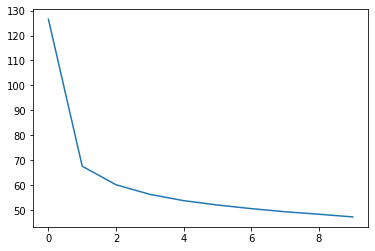

In [10]:
plt.plot(losses)
plt.show()

In [11]:
model.eval()

with torch.no_grad():
    y_true = []
    y_pred = []

    for images, labels in val_loader:
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)

        output = model(images)
        _, preds = torch.max(output.data, 1)

        y_true += list(labels.cpu().numpy())
        y_pred += list(preds.cpu().numpy())

    print(classification_report(y_true, y_pred, target_names=train_dataset.classes))

              precision    recall  f1-score   support

 T-shirt/top       0.79      0.83      0.81      1000
     Trouser       0.86      0.98      0.91      1000
    Pullover       0.82      0.50      0.62      1000
       Dress       0.90      0.76      0.83      1000
        Coat       0.50      0.94      0.66      1000
      Sandal       1.00      0.56      0.72      1000
       Shirt       0.73      0.22      0.34      1000
     Sneaker       0.86      0.77      0.81      1000
         Bag       0.76      0.98      0.86      1000
  Ankle boot       0.70      0.99      0.82      1000

    accuracy                           0.75     10000
   macro avg       0.79      0.75      0.74     10000
weighted avg       0.79      0.75      0.74     10000



*----------------------------------------------------------------------------------------------------*

________________________________________________________________________

In [0]:

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import math
from torch.autograd import Variable

import torchvision
from torchvision import transforms

In [0]:
def conv3x3(in_planes, out_planes, stride=1):
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)

In [0]:
class BasicBlock(nn.Module):
    expansion = 1
    
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride
    
    def forward(self, x):
        residual = x
        
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        
        out = self.conv2(out)
        out = self.bn2(out)
        
        if self.downsample is not None:
            residual = self.downsample(x)
        
        out += residual
        out = self.relu(out)
        
        return out

class Bottleneck(nn.Module):
    expansion = 4
    
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)

        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride,
                            padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.conv3 = nn.Conv2d(planes, planes*4, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(planes*4)

        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out

class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=10):
        self.inplanes = 64
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1,
                               bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        
        self.avgpool = nn.AvgPool2d(7)
        self.fc = nn.Linear(256*block.expansion, num_classes)
        
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()
    
    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes*block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes*block.expansion, kernel_size=1,
                          stride=stride, bias=False),
                nn.BatchNorm2d(planes*block.expansion)
            )
            
        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))
        
        return nn.Sequential(*layers)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        
        return x

In [0]:
def resnet18(**kwargs):
    return ResNet(BasicBlock, [2, 2, 2, 2], **kwargs)

def resnet34(**kwargs):
    return ResNet(BasicBlock, [3, 4, 6, 3], **kwargs)

def resnet50(**kwargs):
    return ResNet(Bottleneck, [3, 4, 6, 3], **kwargs)

def resnet101(**kwargs):
    return ResNet(Bottleneck, [3, 4, 23, 3], **kwargs)

def resnet152(**kwargs):
    return ResNet(Bottleneck, [3, 8, 26, 3], **kwargs)

In [16]:
print(torch.cuda.is_available())
device = torch.device('cuda')

True


In [0]:
num_epochs = 10
batch_size = 4
learning_rate = 0.0001

# Data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [0]:
model = resnet18().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [19]:
running_loss = 0
#running_accuracy = 0

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        #_, preds = torch.max(outputs.data, 1)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
    running_loss += loss.item()
    #running_accuracy += torch.sum(preds == labels)
    
    print(f'Epoch {epoch+1}/{num_epochs}')
    print(f'Loss {running_loss / len(train_loader)}')
    #print(f'Accuracy {running_accuracy.double() / len(train_loader)}')
    print()

Epoch 1/10
Loss 4.698161284128825e-06

Epoch 2/10
Loss 1.9125235080718994e-05

Epoch 3/10
Loss 2.0194506645202635e-05

Epoch 4/10
Loss 3.7576731046040856e-05

Epoch 5/10
Loss 3.7695511182149253e-05

Epoch 6/10
Loss 3.91157070795695e-05

Epoch 7/10
Loss 4.491902192433675e-05

Epoch 8/10
Loss 4.83388622601827e-05

Epoch 9/10
Loss 4.8980478445688885e-05

Epoch 10/10
Loss 4.905581076939901e-05



In [20]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        _, preds = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (preds == labels).sum().item()
    
    print(f'Accuracy {correct / total}')

Accuracy 0.929


In [22]:
losses = []

model.train()

for epoch in range(n_epochs):
    running_loss = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        output = model(images)
        loss = criterion(output, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    losses.append(running_loss / len(train_loader))
    print(f'Epoch {epoch + 1}/{n_epochs}: {losses[-1]:.4f}')

Epoch 1/10: 0.2263
Epoch 2/10: 0.1893
Epoch 3/10: 0.1654
Epoch 4/10: 0.1449
Epoch 5/10: 0.1336
Epoch 6/10: 0.1215
Epoch 7/10: 0.1088
Epoch 8/10: 0.0967
Epoch 9/10: 0.0927
Epoch 10/10: 0.0821


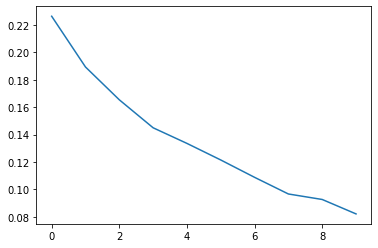

In [23]:
plt.plot(losses)
plt.show()

In [24]:
model.eval()

with torch.no_grad():
    y_true = []
    y_pred = []

    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)

        output = model(images)
        _, preds = torch.max(output.data, 1)

        y_true += list(labels.cpu().numpy())
        y_pred += list(preds.cpu().numpy())

    print(classification_report(y_true, y_pred, target_names=train_dataset.classes))

              precision    recall  f1-score   support

 T-shirt/top       0.71      0.81      0.76      1000
     Trouser       0.98      0.87      0.92      1000
    Pullover       0.77      0.84      0.80      1000
       Dress       0.78      0.90      0.84      1000
        Coat       0.90      0.63      0.74      1000
      Sandal       0.99      0.68      0.81      1000
       Shirt       0.65      0.68      0.66      1000
     Sneaker       0.90      0.94      0.92      1000
         Bag       0.80      0.96      0.87      1000
  Ankle boot       0.94      0.97      0.95      1000

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000

